In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Preparing the Data

In [11]:
df_curve = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/Yield.csv')
df_curve.head()

,T,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
0,2001-01-02,4.692,4.5650,4.6550,4.7550,4.870,5.102,5.345,5.742
1,2001-01-03,4.619,4.5715,4.6550,4.7600,4.870,5.089,5.306,5.716
2,2001-01-04,4.526,4.5350,4.6650,4.7725,4.885,5.103,5.324,5.734
3,2001-01-05,4.458,4.4588,4.5888,4.7138,4.830,5.046,5.278,5.703
4,2001-01-08,4.451,4.4738,4.5850,4.7050,4.830,5.050,5.264,5.694


In [12]:
df_curve.set_index('T',inplace=True)

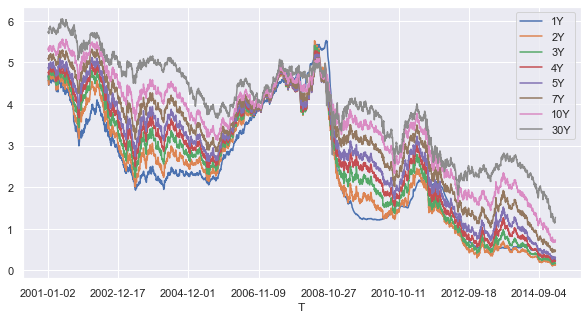

In [14]:
df_curve.plot(figsize=(10,5));

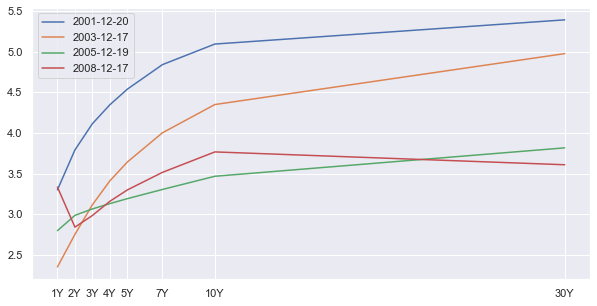

In [48]:
dates = ['2001-12-20','2003-12-17','2005-12-19','2008-12-17']
fix,ax = plt.subplots(1,1,figsize=(10,5))
for d in dates:
    curve_on_day = df_curve.loc[d,:]
    x_ticks = [np.float(x.split('Y')[0]) for x in np.array(df_curve.columns.values)]
    ax.plot(x_ticks,curve_on_day.values,label=d)


ax.set_xticks(x_ticks)
ax.set_xticklabels(np.array(df_curve.columns.values));
ax.legend();

In [5]:
df_curve = df_curve.diff()

In [6]:
df_curve.dropna(how='any',inplace=True)
dr = df_curve.values

Principal Components

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
pca.fit(dr)

PCA()

First Component

Text(0.5, 1.0, 'Eigenvector 4')

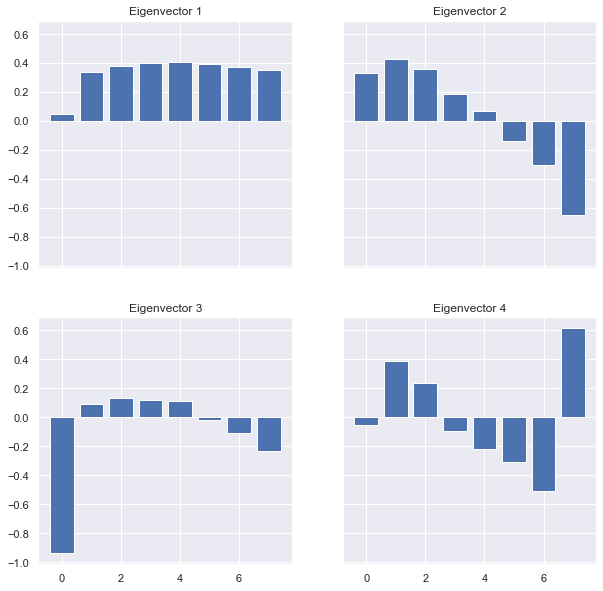

In [9]:
fig,ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
nbr = 1
ax[0,0].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[0,0].set_title('Eigenvector '+str(nbr))

nbr = 2
ax[0,1].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[0,1].set_title('Eigenvector '+str(nbr))

nbr = 3
ax[1,0].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[1,0].set_title('Eigenvector '+str(nbr))

nbr = 4
ax[1,1].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[1,1].set_title('Eigenvector '+str(nbr))


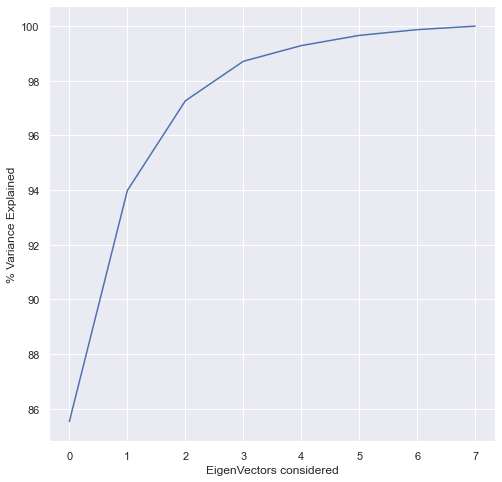

In [57]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(np.arange(0,len(df_curve.columns)),100*np.cumsum(pca.explained_variance_ratio_));
ax.set_ylabel('% Variance Explained')
ax.set_xlabel('EigenVectors considered');